Date: 3-July-2017.

This Notebook is for capstone project.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn import preprocessing
from sklearn.cross_validation import train_test_split

#models
import xgboost as xgb

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)



C:\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [3]:
# Reading macro.csv

macro_df = pd.read_csv("input/macro.csv")
print (macro_df.shape)
macro_df.head()


(2484, 100)


,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,brent,net_capital_export,gdp_annual,gdp_annual_growth,average_provision_of_build_contract,average_provision_of_build_contract_moscow,rts,micex,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,grp,grp_growth,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,invest_fixed_capital_per_cap,invest_fixed_assets,profitable_enterpr_share,unprofitable_enterpr_share,share_own_revenues,overdue_wages_per_cap,fin_res_per_cap,marriages_per_1000_cap,divorce_rate,construction_value,invest_fixed_assets_phys,pop_natural_increase,pop_migration,pop_total_inc,childbirth,mortality,housing_fund_sqm,lodging_sqm_per_cap,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,NaN,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,175.15,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,178.66,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,43.4054,80.12,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,183.44,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.

Not sure how to use macro, but it looks to have important data.

In [4]:
# Import train data into train_df

train_df = pd.read_csv("input/train.csv")
print (train_df.shape)
train_df.head(n=5)

(30471, 292)


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

## Data Preprocessing


----------


The data set is very extensive with 292 features and about 30,000 samples.
Also, few data points are missing in few features.

In [5]:
# Checking the data type of the columns

train_df = pd.read_csv("input/train.csv", parse_dates= ["timestamp"])
datatype_df = train_df.dtypes.reset_index()
datatype_df.columns = ["Column", "ColumnType"]
datatype_df.groupby("ColumnType").aggregate('count').reset_index()

,ColumnType,Column
0,int64,157
1,datetime64[ns],1
2,float64,119
3,object,15


## Missing data analysis

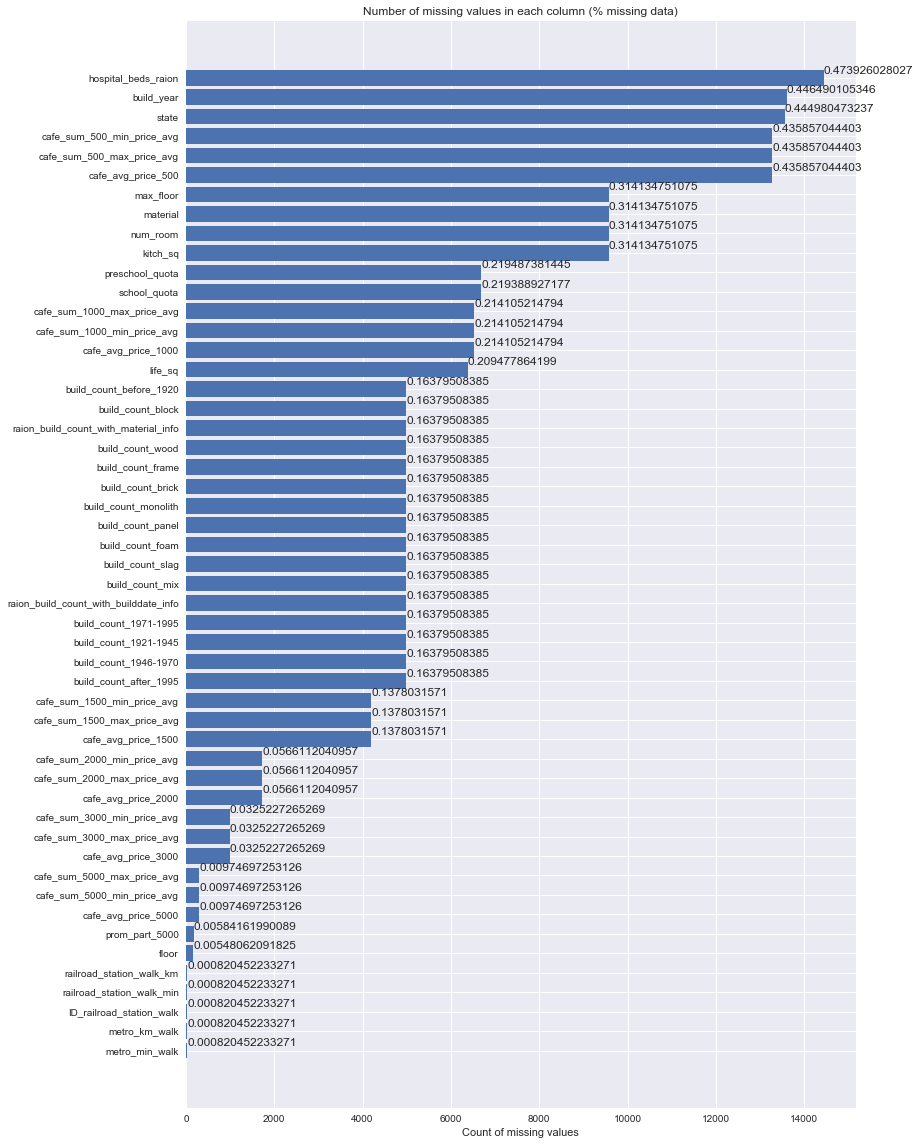

In [6]:
# Checking the Missing data

missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ["name", "missing_count"]
missing_df = missing_df.loc[missing_df.missing_count > 0]
missing_df = missing_df.sort_values(by="missing_count", ascending = 1)
index = np.arange(missing_df.shape[0])

fig, ax = plt.subplots(figsize = (12,20))
ax.barh(index, missing_df.missing_count)
ax.set_yticks(index)
ax.set_yticklabels(missing_df.name.values)
for i,v in enumerate(missing_df.missing_count):
    ax.text(v+3, i+0.25, str(v/train_df.shape[0]))
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column (% missing data)")
plt.show()



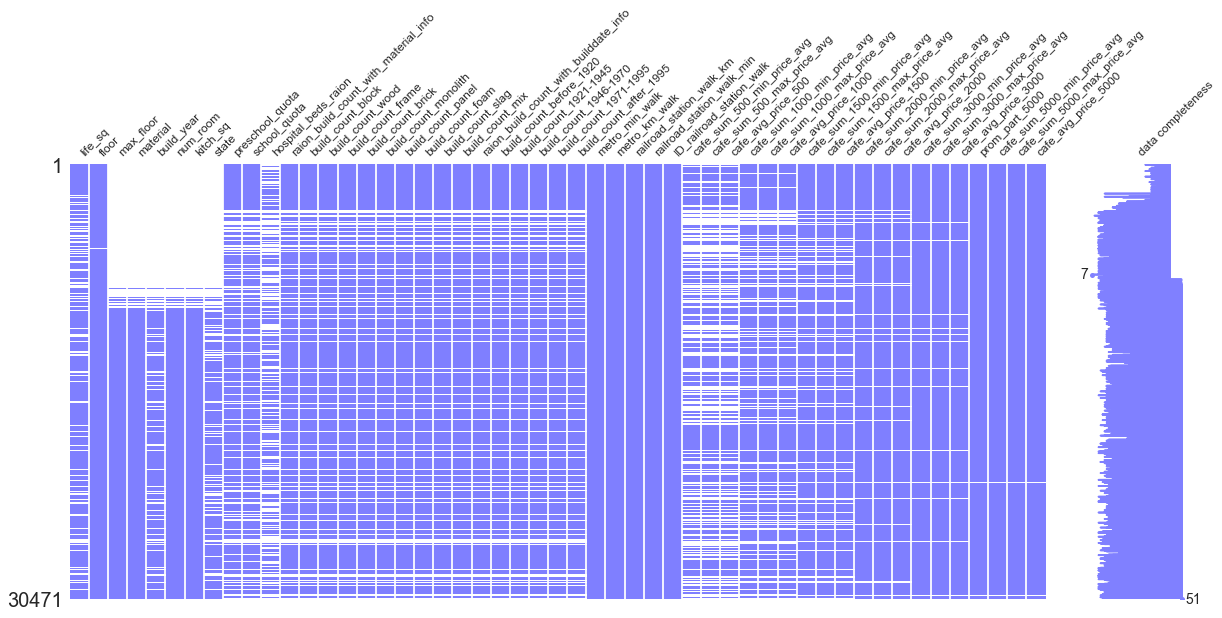

In [7]:
missing_df = train_df.columns[train_df.isnull().any()].tolist()
msno.matrix(train_df[missing_df],width_ratios=(10,1),\
            figsize=(20,8),color=(0.5, 0.5, 1),fontsize=12,sparkline=True,labels=True)

## Data Corrections: (not  yet finished)
Based on the suggestions from the discussion forums there are few changes in the data:

To do: move this section after further analysis

In [29]:
train_df["state"].loc[train_df.state > 4]


10089    33.0
Name: state, dtype: float64

## Feature exploration:

After a brief exploration of all features explained in the data dictionary, the data can be classified into 
 1. Housing Characteristics
 2. Demographic Characterisitics
 3. School Characteristics
 4. Cultural/Recreational Characteristics
 5. Infrastructure Features

In [30]:
 list(train_df.columns)

['id',
 'timestamp',
 'full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'product_type',
 'sub_area',
 'area_m',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'children_preschool',
 'preschool_quota',
 'preschool_education_centers_raion',
 'children_school',
 'school_quota',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'hospital_beds_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all'

 ## Housing Characteristics:
 
 Features include: 
 
- price_doc: sale price (this is the target variable)
- id: transaction id
- timestamp: date of transaction
- full_sq: total area in square meters, including loggias, balconies and other non-residential areas
- life_sq: living area in square meters, excluding loggias, balconies and other non-residential areas
- floor: for apartments, floor of the building
- max_floor: number of floors in the building
- material: wall material
- build_year: year built
- num_room: number of living rooms
- kitch_sq: kitchen area
- state: apartment condition
- product_type: owner-occupier purchase or investment
- sub_area: name of the district

C:\Continuum\Anaconda3\lib\site-packages\seaborn\matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
C:\Continuum\Anaconda3\lib\site-packages\seaborn\matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


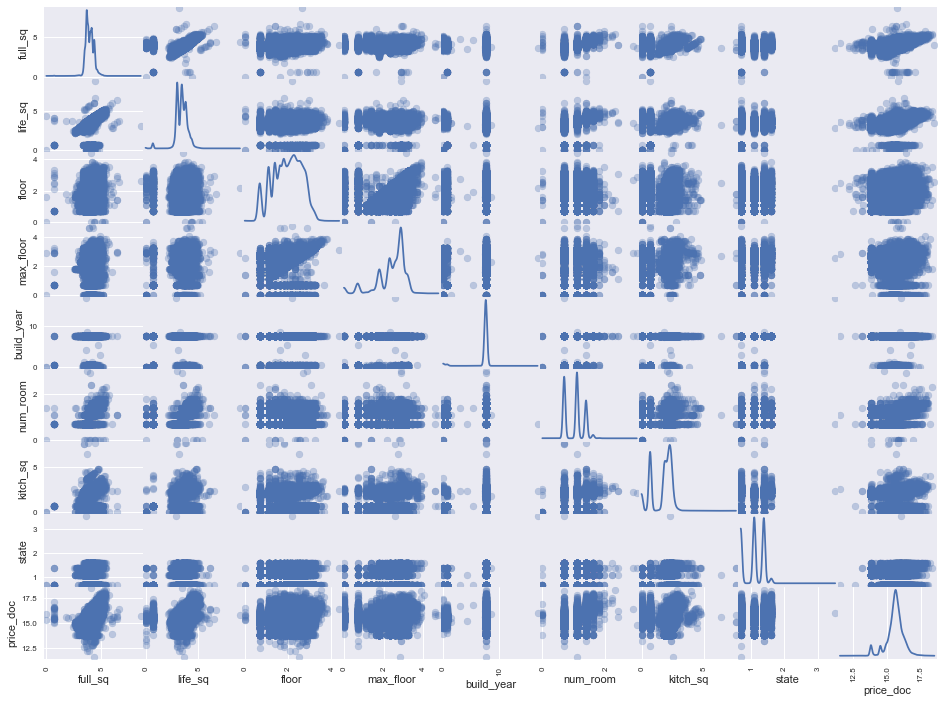

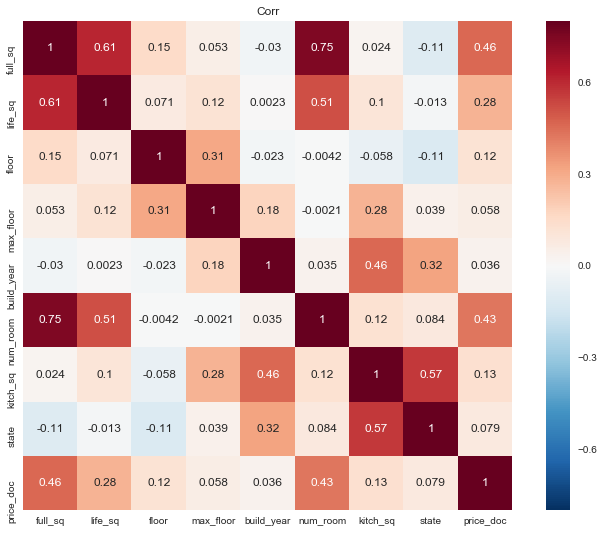

In [10]:
internal_char = train_df[['full_sq', 'life_sq', 'floor', 'max_floor', 'build_year',
                          'num_room', 'kitch_sq', 'state', 'price_doc']]

internal_char = np.log1p(internal_char)
corrmat_internal = internal_char.corr()

# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(internal_char, alpha = 0.3, figsize = (16,12), diagonal = 'kde', marker= 'o');
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))
# Draw the heatmap using seaborn
sns.heatmap(corrmat_internal, vmax=.8, square=True, annot=True, ax = ax);
ax.set_title('Corr')
plt.show()

## Demographic Characteristics

Features include:

- 'area_m' 
- 'raion_popul' 
- 'full_all' 
- 'male_f' 
- 'female_f' 
- 'young_all' 
- 'young_female' 
- 'work_all' 
- 'work_male' 
- 'work_female' 
- 'price_doc'

C:\Continuum\Anaconda3\lib\site-packages\seaborn\matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
C:\Continuum\Anaconda3\lib\site-packages\seaborn\matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


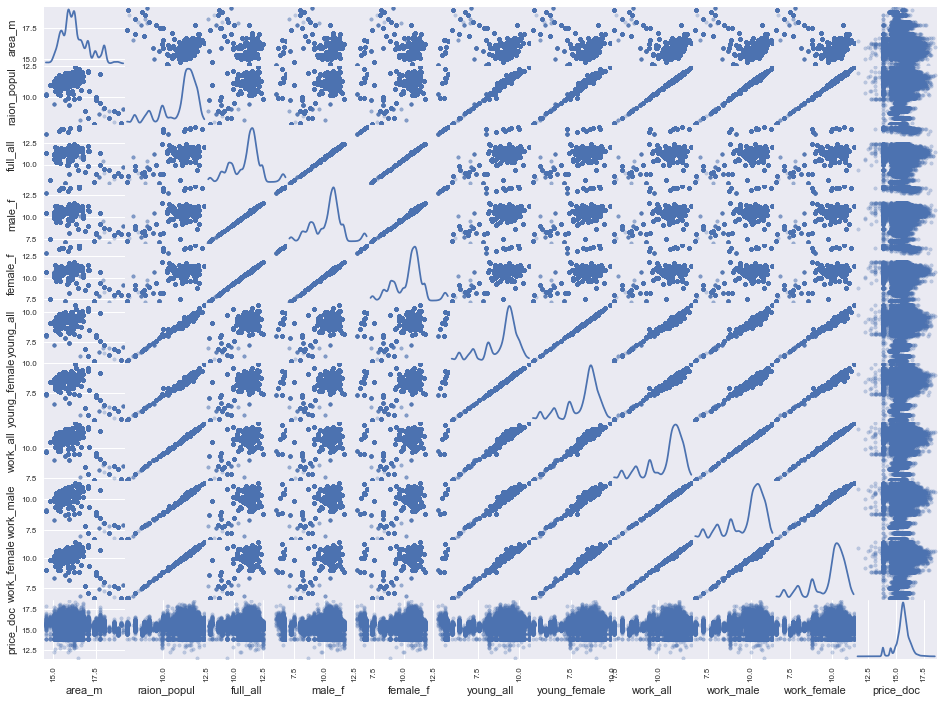

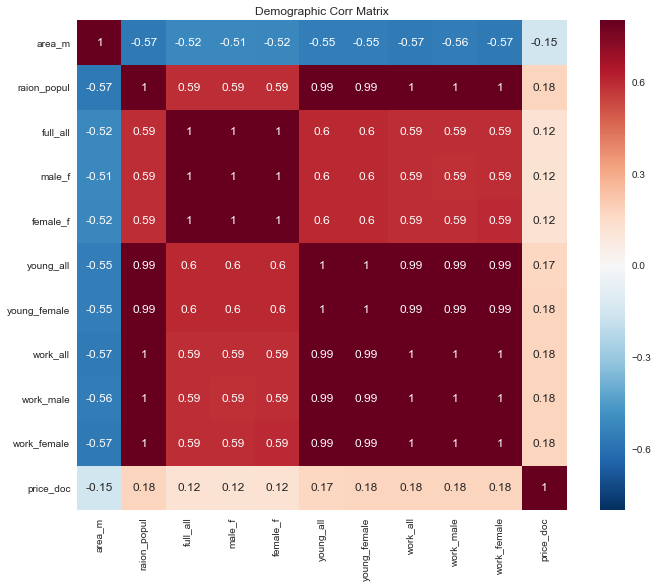

In [21]:
dgraph_char = train_df[['area_m', 'raion_popul', 'full_all', 'male_f', 'female_f', 'young_all', 
               'young_female', 'work_all', 'work_male', 'work_female', 'price_doc']]

dgraph_char = np.log1p(dgraph_char)
corrmat_dgraph = dgraph_char.corr()

# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(dgraph_char, alpha = 0.3, figsize = (16,12), diagonal = 'kde');

# Create  a matplotlib figure for correlation plot
f2, ax2 = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat_dgraph, vmax=.8, square=True,annot=True, ax = ax2);
ax2.set_title('Demographic Corr Matrix')
plt.show()

## Education Environment Characterstics:

Features include:

- children_preschool 
- preschool_quota  
- preschool_education_centers_raion
- children_school 
- school_quota 
- school_education_centers_raion 
- school_education_centers_top_20_raion  
- university_top_20_raion 
- additional_education_raion 
- additional_education_km  
- university_km 
- price_doc 

C:\Continuum\Anaconda3\lib\site-packages\seaborn\matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
C:\Continuum\Anaconda3\lib\site-packages\seaborn\matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


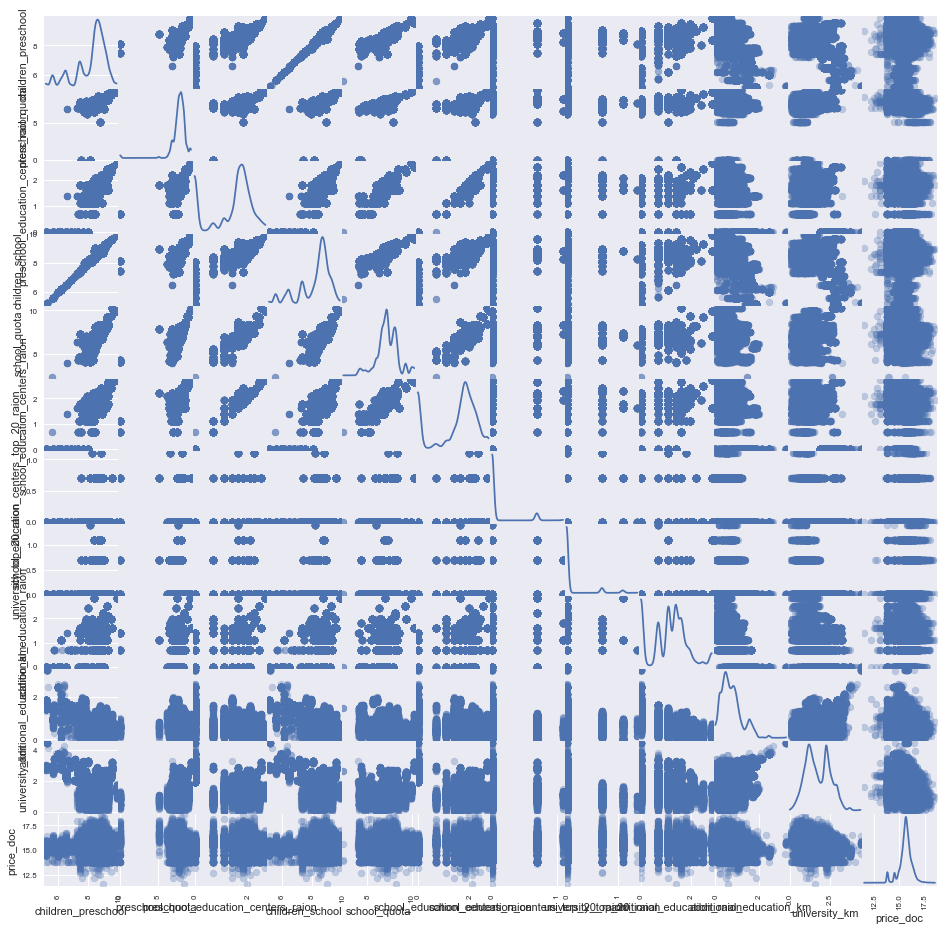

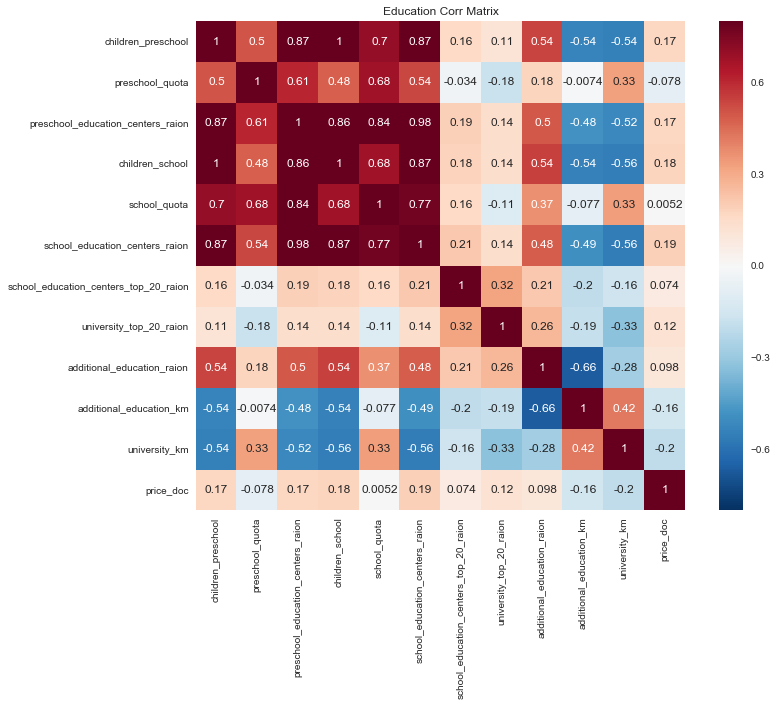

In [31]:
edu_char = train_df[['children_preschool', 'preschool_quota', 'preschool_education_centers_raion',
                  'children_school', 'school_quota', 'school_education_centers_raion', 
                  'school_education_centers_top_20_raion', 'university_top_20_raion',
                  'additional_education_raion', 'additional_education_km', 'university_km',
                  'price_doc']]

edu_char = np.log1p(edu_char)
corrmat_edu = edu_char.corr()

# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(edu_char, alpha = 0.3,figsize = (16,16), diagonal = 'kde', marker= 'o');

# Create  a matplotlib figure for correlation plot
f2, ax2 = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat_edu, vmax=.8, square=True,annot=True, ax = ax2);
ax2.set_title('Education Corr Matrix')
plt.show()

## Cultural Characteristics

- sport_objects_raion
- culture_objects_top_25_raion
- shopping_centers_raion
- park_km
- fitness_km
- swim_pool_km
- ice_rink_km
- stadium_km
- basketball_km
- shopping_centers_km
- big_church_km
- church_synagogue_km
- mosque_km
- theater_km
- museum_km
- exhibition_km
- catering_km
- price_doc

C:\Continuum\Anaconda3\lib\site-packages\seaborn\matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
C:\Continuum\Anaconda3\lib\site-packages\seaborn\matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


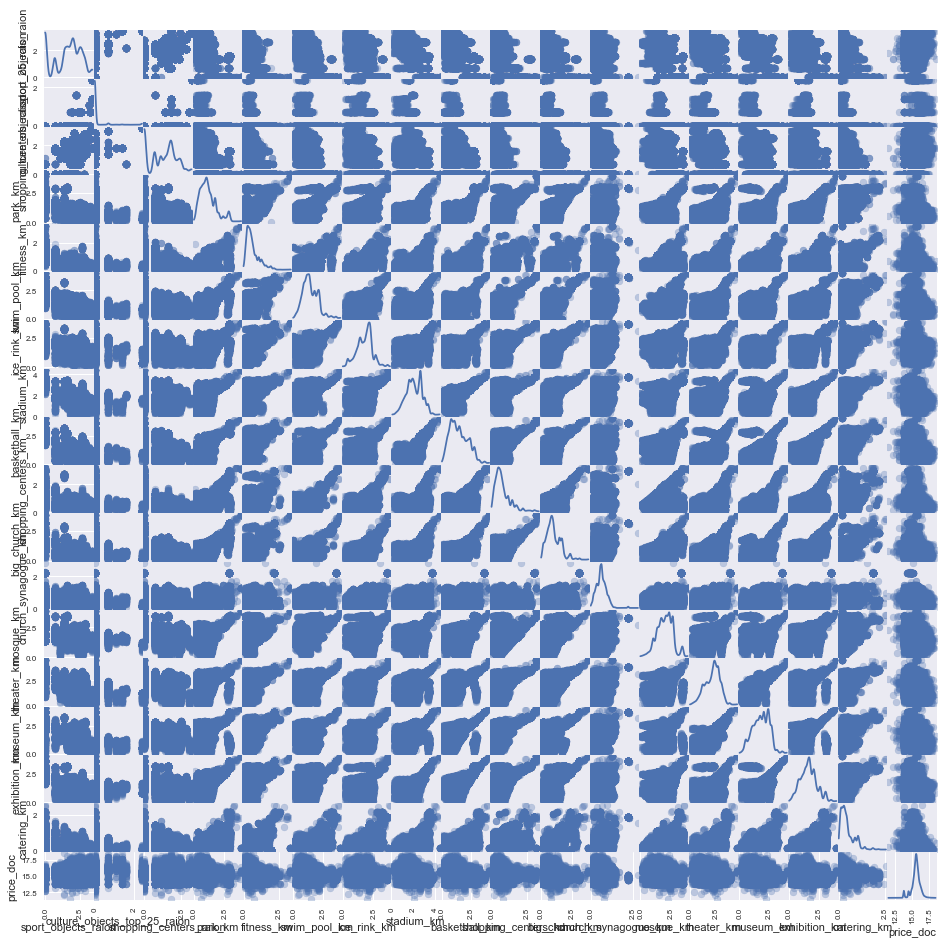

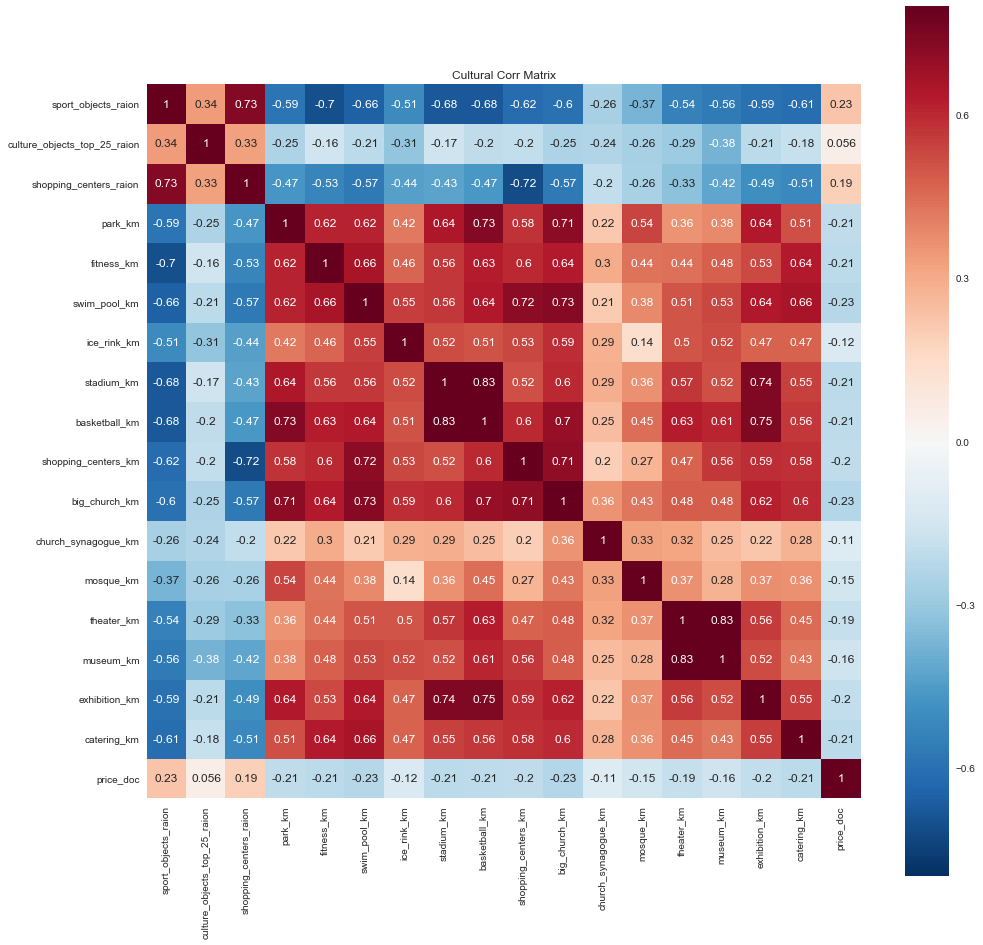

In [32]:
cul_char = train_df[['sport_objects_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion',
              'park_km', 'fitness_km', 'swim_pool_km', 'ice_rink_km','stadium_km', 'basketball_km',
              'shopping_centers_km', 'big_church_km','church_synagogue_km', 'mosque_km', 'theater_km',
              'museum_km', 'exhibition_km', 'catering_km', 'price_doc']]
cul_char = np.log1p(cul_char)
corrmat_cul = cul_char.corr()
# Produce a scatter matrix for each pair of features in the data

pd.scatter_matrix(cul_char, alpha = 0.3,figsize = (16,16), diagonal = 'kde', marker= 'o');

# Create  a matplotlib figure for correlation plot
f2, ax2 = plt.subplots(figsize=(16,16))

# Draw the heatmap using seaborn
sns.heatmap(corrmat_cul, vmax=.8, square=True,annot=True, ax = ax2);
ax2.set_title('Cultural Corr Matrix')
plt.show()

## Infra Characteristics

- nuclear_reactor_km
- thermal_power_plant_km
- power_transmission_line_km
- incineration_km
- water_treatment_km
- incineration_km
- railroad_station_walk_km
- railroad_station_walk_min
- railroad_station_avto_km
- railroad_station_avto_min
- public_transport_station_km
- public_transport_station_min_walk
- water_km
- mkad_km
- ttk_km
- sadovoe_km
- bulvar_ring_km
- kremlin_km
- price_doc

C:\Continuum\Anaconda3\lib\site-packages\seaborn\matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
C:\Continuum\Anaconda3\lib\site-packages\seaborn\matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


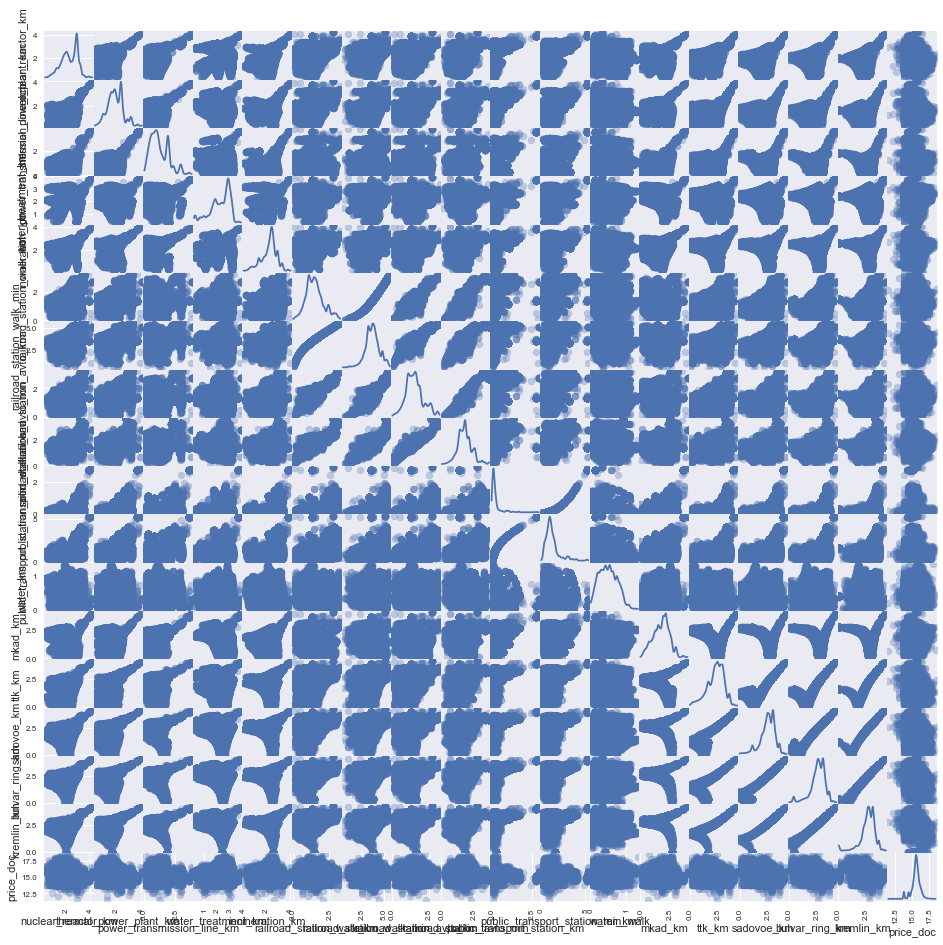

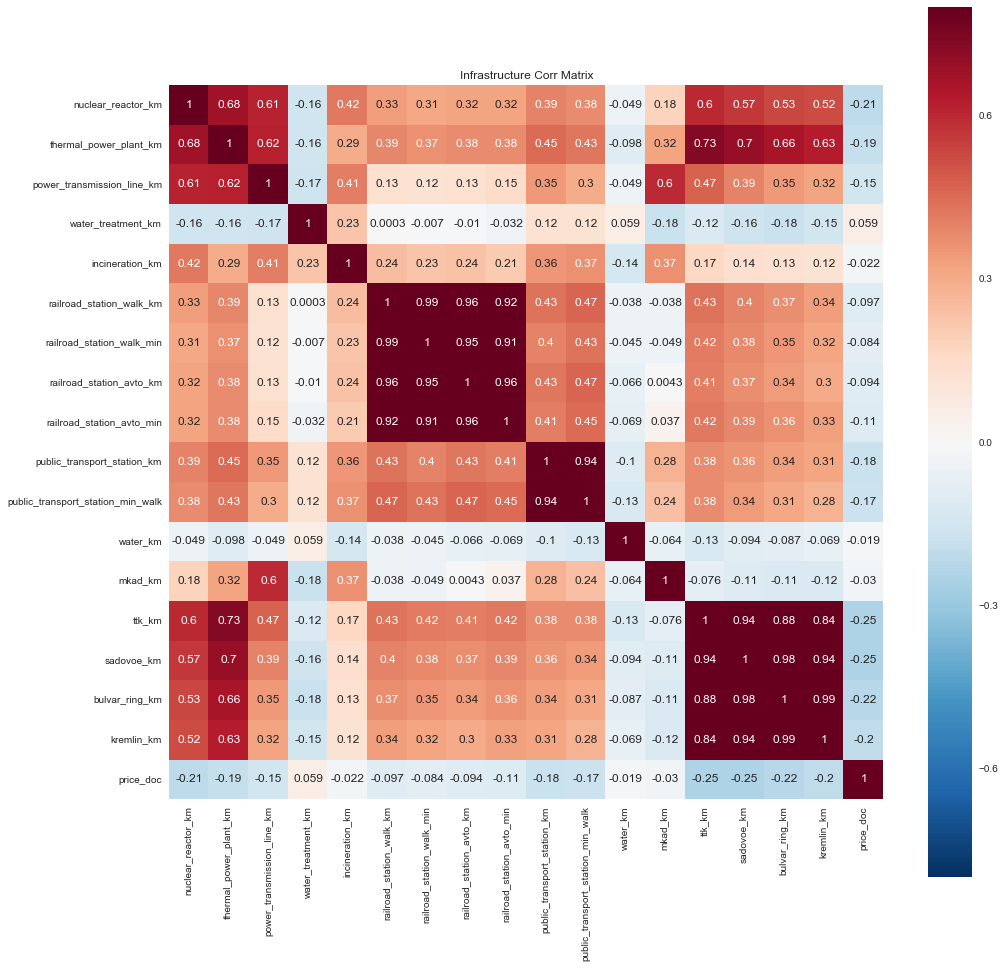

In [33]:
infra_char = train_df[['nuclear_reactor_km','thermal_power_plant_km', 'power_transmission_line_km',
                        'water_treatment_km', 'incineration_km', 'railroad_station_walk_km',
                       'railroad_station_walk_min', 'railroad_station_avto_km', 'railroad_station_avto_min',
                       'public_transport_station_km', 'public_transport_station_min_walk', 'water_km',                         
                       'mkad_km', 'ttk_km', 'sadovoe_km','bulvar_ring_km', 'kremlin_km',
                       'price_doc']]

infra_char = np.log1p(infra_char)
corrmat_infra = infra_char.corr()

pd.scatter_matrix(infra_char, alpha = 0.3,figsize = (16,16), diagonal = 'kde', marker= 'o');

# Create  a matplotlib figure for correlation plot
f2, ax2 = plt.subplots(figsize=(16, 16))

# Draw the heatmap using seaborn
sns.heatmap(corrmat_infra, vmax=.8, square=True,annot=True, ax = ax2);
ax2.set_title('Infrastructure Corr Matrix')
plt.show()

## Interpretations from the data analysis:

- skewness
    - Most of the data is left skewed

- Need to perform transformations
    - Log transformation np.log1(y)

- correlation between the features
    - lot of correlation -> School Characteristics; Demographics Characteristcs
    
- multicolinearity
    - Can be reduced by selecting one out of correalated data?
    
- Usage of macros
    - How to use macro?




# Log Transformations

 Log transformation did not improve predictions. Probably due to correlated relationships in cultural and infra data.

## Feature Engineering based on time stamp

In [76]:
train_df['year_month'] = train_df['timestamp'].apply(lambda x : x[:4] + "-" + x[5:7])
train_df['year'] = train_df['timestamp'].apply(lambda x : x[:4])
train_df['month'] = train_df['timestamp'].apply(lambda x : x[5:7])


0        6274411.0
1        6274411.0
2        6274411.0
3        6274411.0
4        6274411.0
5        6274411.0
6        6274411.0
7        6274411.0
8        6274411.0
9        6274411.0
10       6274411.0
11       6274411.0
12       6274411.0
13       6274411.0
14       6274411.0
15       6274411.0
16       6274411.0
17       6274411.0
18       6274411.0
19       6274411.0
20       6274411.0
21       6274411.0
22       6274411.0
23       6274411.0
24       6274411.0
25       6274411.0
26       6274411.0
27       6274411.0
28       6274411.0
29       6274411.0
30       6274411.0
31       6274411.0
32       6274411.0
33       6274411.0
34       6274411.0
35       6274411.0
36       6274411.0
37       6274411.0
38       6274411.0
39       6274411.0
40       6274411.0
41       6274411.0
42       6274411.0
43       6274411.0
44       6274411.0
45       6274411.0
46       6274411.0
47       6274411.0
48       6274411.0
49       6274411.0
50       6274411.0
51       6274411.0
52       627

### Variation of prices through the year and months:

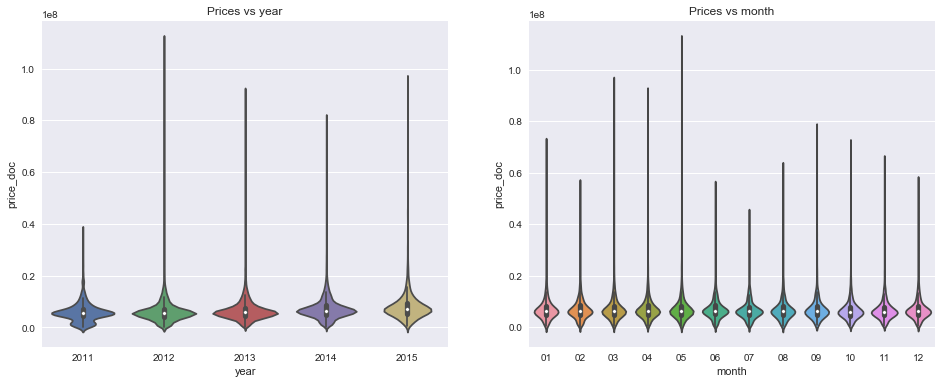

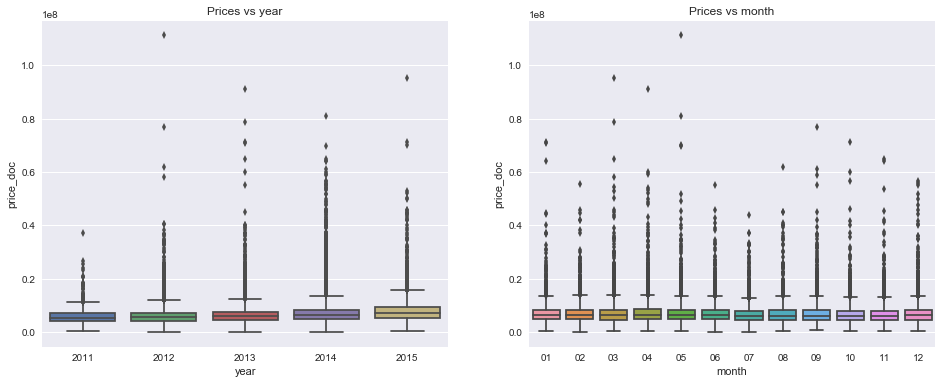

In [72]:
fig1, (ax1,ax2) = plt.subplots(figsize=(16,6), ncols=2)
sns.violinplot(data=train_df, y='price_doc',x='year', orient='v', ax=ax1)
ax1.set(title = 'Prices vs year')
sns.violinplot(data=train_df, y='price_doc',x='month', orient='v', ax=ax2)
ax2.set(title = 'Prices vs month')
plt.show()

fig2, (ax3,ax4) = plt.subplots(figsize=(16,6), ncols=2)
sns.boxplot(data=train_df, y='price_doc',x='year', orient='v', ax=ax3)
ax3.set(title = 'Prices vs year')
sns.boxplot(data=train_df, y='price_doc',x='month', orient='v', ax=ax4)
ax4.set(title = 'Prices vs month')
plt.show()

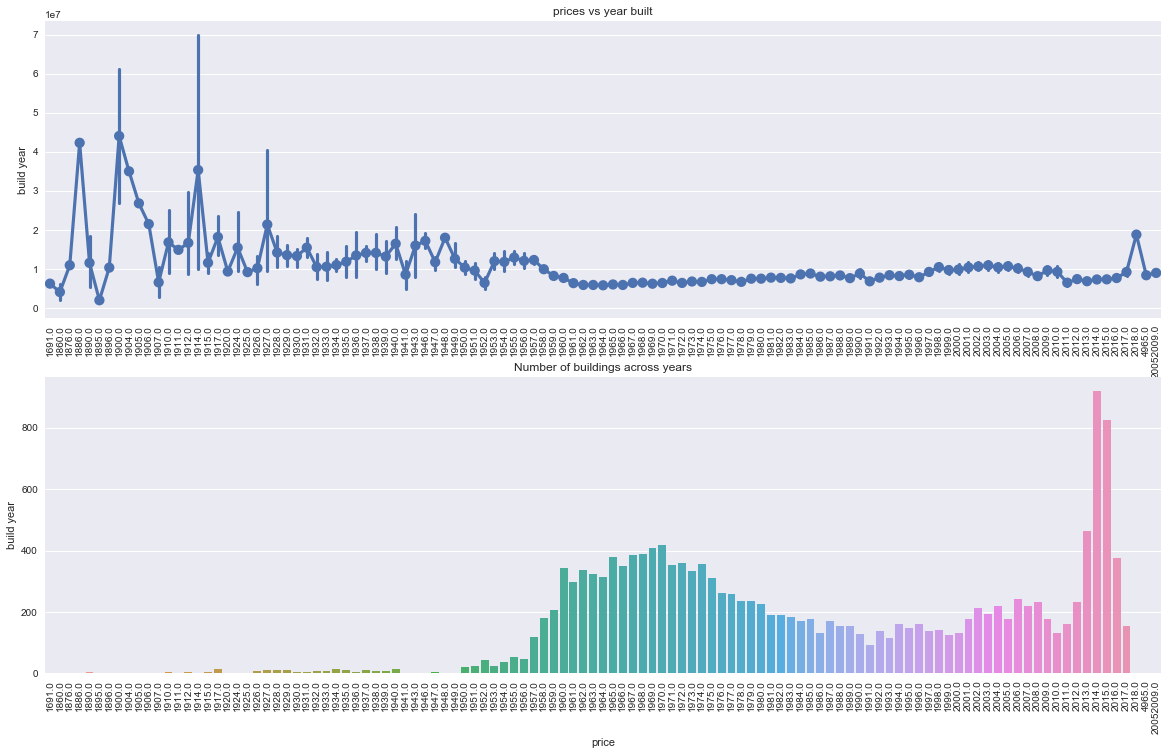

In [168]:
# prices over time
build_train_df = train_df.loc[(train_df['build_year']>1650) ].reset_index()

fig,(ax1,ax2) = plt.subplots(figsize=(20,12),nrows=2)
sns.pointplot(data=build_train_df,y='price_doc', x='build_year', orient='v',ax=ax1)
ax1.set_xticklabels(ax1.xaxis.get_majorticklabels(),rotation = 90)
sns.countplot(data=build_train_df,x='build_year',ax=ax2)
plt.xticks(rotation = 90)
ax1.set(title="prices vs year built", xlabel='price',ylabel='build year')
ax2.set(title="Number of buildings across years", xlabel='price',ylabel='build year')

plt.show()

C:\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
C:\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


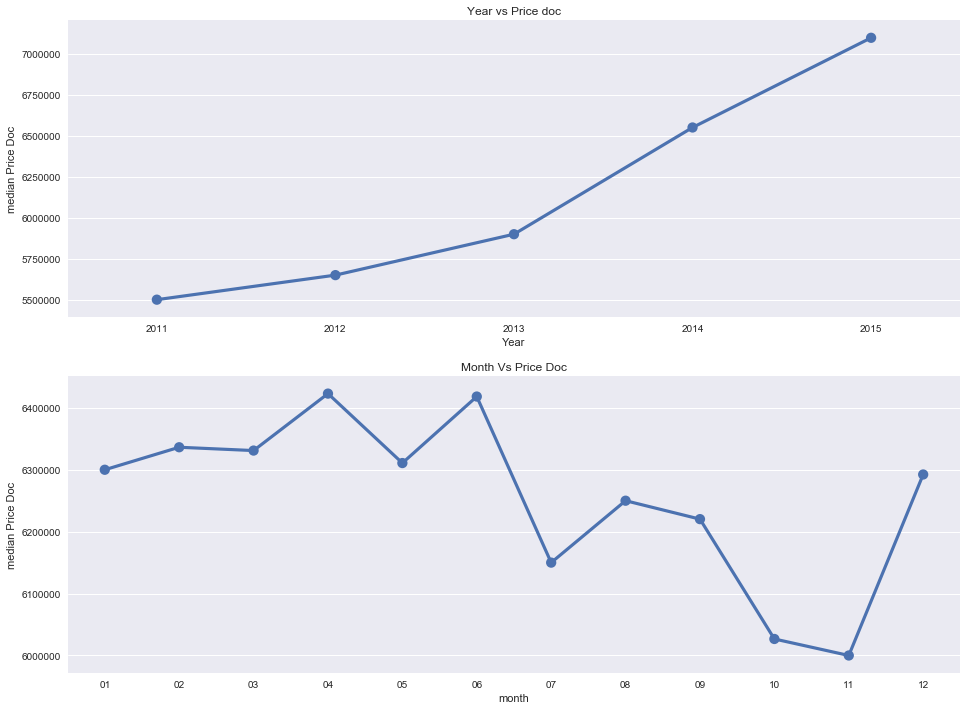

In [208]:
# median price over time
group_median_year_df = train_df.groupby('year')['price_doc'].aggregate(np.median).reset_index()
#group_median_build_year_df = train_df.groupby('build_year')['price_doc'].aggregate(np.median).reset_index()
group_median_year_month_df = train_df.groupby('month')['price_doc'].aggregate(np.median).reset_index()

fig, (ax1,ax2) = plt.subplots(figsize = (16,12), nrows=2)
sns.pointplot(data=group_median_year_df, y='price_doc', x='year', ax=ax1)
sns.pointplot(data=group_median_year_month_df, y='price_doc', x='month', ax=ax2)
ax1.set(ylabel='median Price Doc',xlabel="Year",title="Year vs Price doc")
ax2.set(ylabel='median Price Doc',xlabel="month",title="Month Vs Price Doc")
plt.show()

# Understanding important features (refer model analysis)

- price vs full_sq
- price vs life_sq (living area)
- price vs floor (floor of building)
- price vs max_floor

In [186]:
# removing outliers
for col in ["price_doc","full_sq","life_sq"]:
    ulimit = np.percentile(train_df[col].values, 99.5)
    llimit = np.percentile(train_df[col].values, 0.5)
    train_df[col].ix[train_df[col]>ulimit] = ulimit
    train_df[col].ix[train_df[col]<llimit] = llimit

C:\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


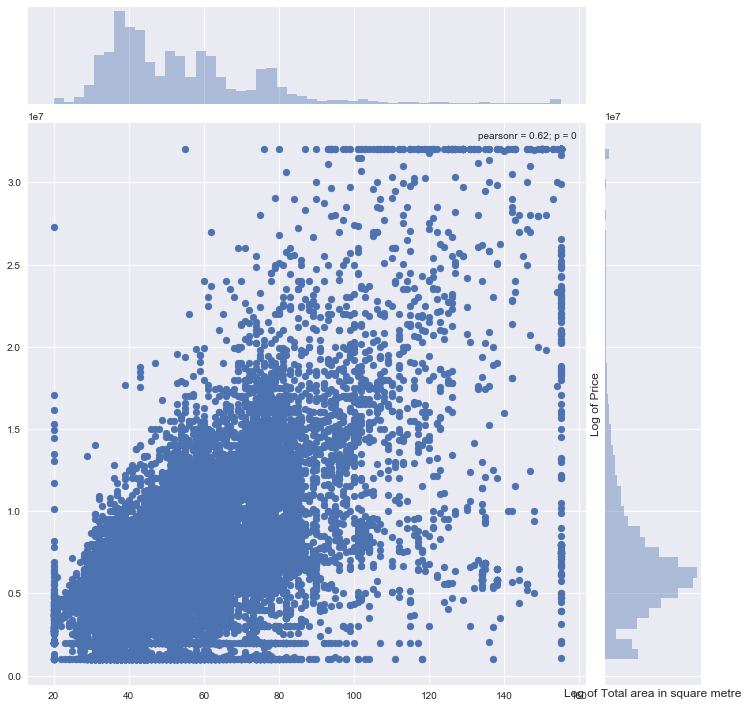

In [187]:
plt.figure(figsize=(12,12))
sns.jointplot(x=(train_df.full_sq.values), y=(train_df.price_doc.values), size=10)
plt.ylabel('Log of Price', fontsize=12)
plt.xlabel('Log of Total area in square metre', fontsize=12)
plt.show()

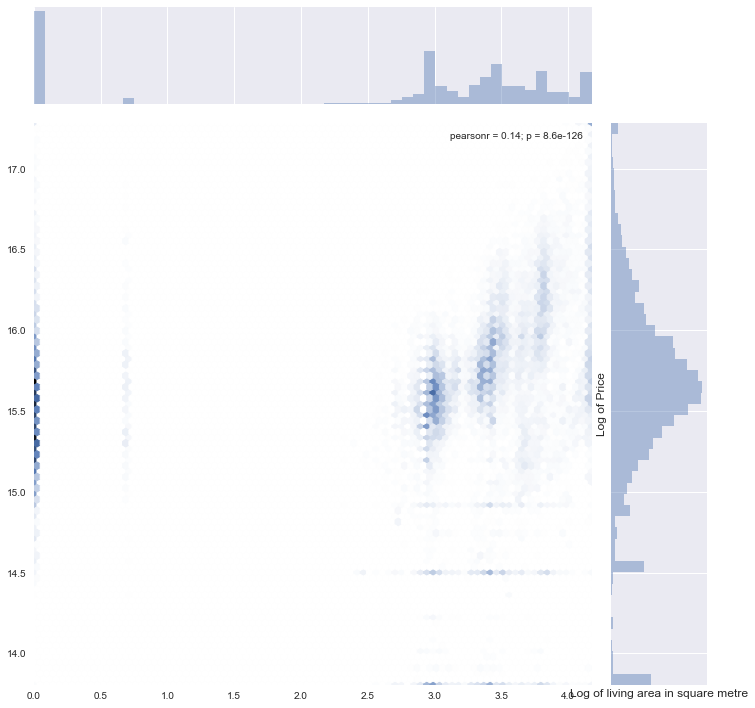

In [188]:
plt.figure(figsize=(12,12))
sns.jointplot(x=np.log1p(train_df.life_sq.values), y=np.log1p(train_df.price_doc.values), 
              kind='hex', size=10)
plt.ylabel('Log of Price', fontsize=12)
plt.xlabel('Log of living area in square metre', fontsize=12)
plt.show()

C:\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


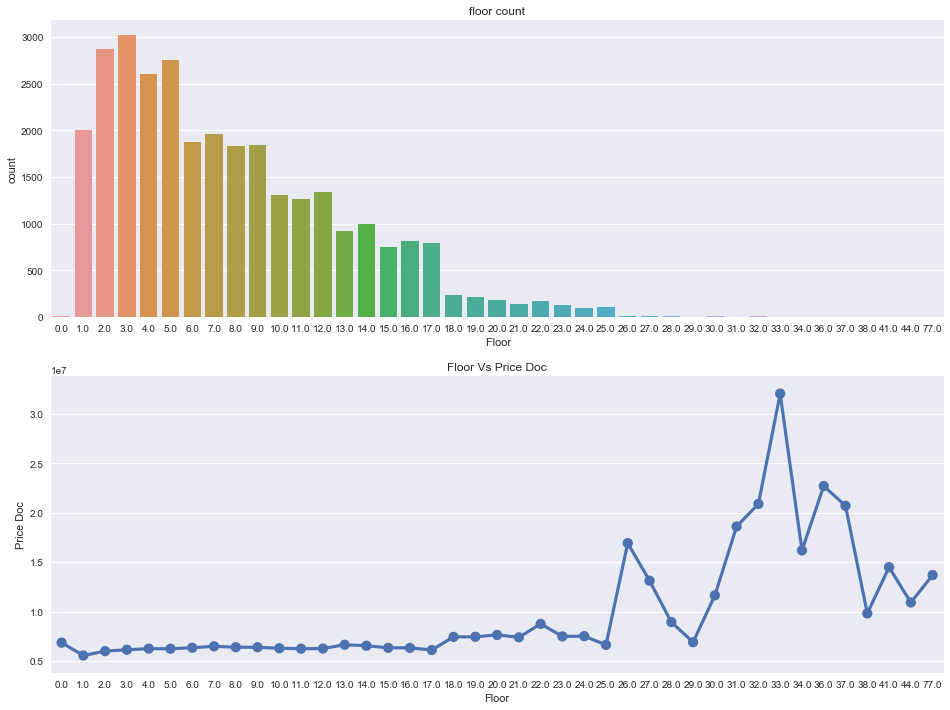

In [199]:
# variations between floor and prices

group_median_floor_df = train_df.groupby("floor")['price_doc'].aggregate(np.median).reset_index()
fig,(ax1,ax2) = plt.subplots(figsize =(16,12),nrows=2)
sns.countplot(data=train_df,x='floor',ax=ax1)
sns.pointplot(data=group_median_floor_df,y='price_doc',x='floor',ax=ax2)
ax1.set(xlabel=" Floor",title="floor count")
ax2.set(ylabel='median Price Doc',xlabel="Floor",title="Floor Vs Price Doc")
plt.show()

C:\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


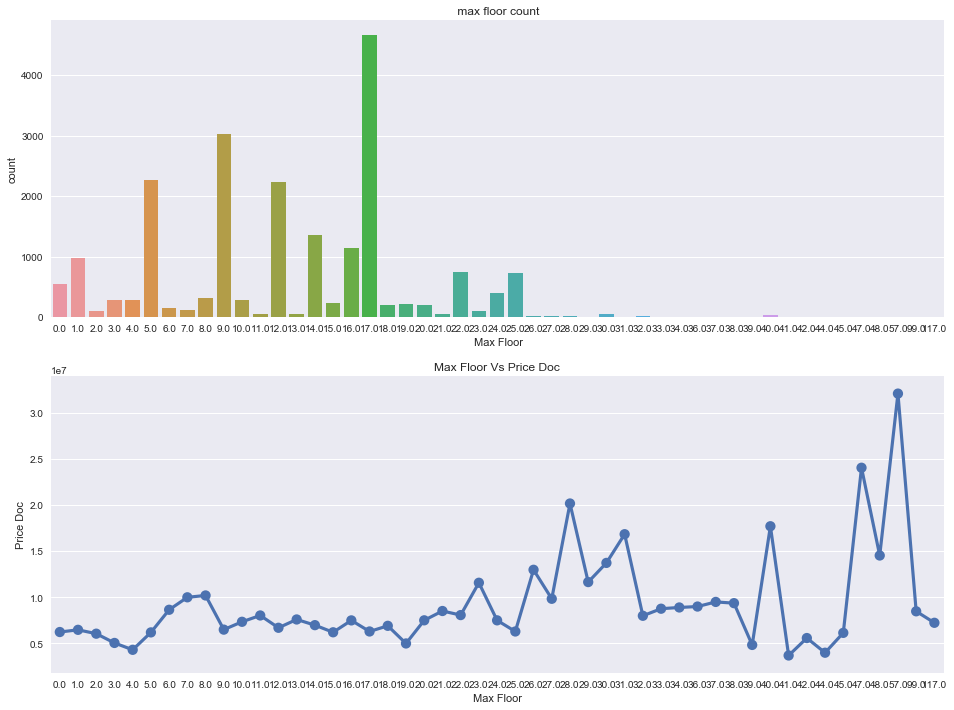

In [206]:
#variations between max floor and prices

group_median_max_floor_df = train_df.groupby("max_floor")['price_doc'].aggregate(np.median).reset_index()
fig,(ax1,ax2) = plt.subplots(figsize =(16,12),nrows=2)
sns.countplot(data=train_df,x='max_floor',ax=ax1)
sns.pointplot(data=group_median_max_floor_df,y='price_doc',x='max_floor')
ax1.set(xlabel=" Max Floor",title=" max floor count")
ax2.set(ylabel='median Price Doc',xlabel="Max Floor",title="Max Floor Vs Price Doc")
plt.show()